# Deducing findings from the Data
## Authors

 - Santiago Bernal

## Introduction
In the previous lab exercise, data was gathered from twitter using different hashtags using the Twitter Developer API. The data was then stored in a MongoDB database for later retrieval and analysis. 

In this lab, we will use the data stored in the previous session and explain through a model the findings that can be deduced from the data. The exercise was developed in Python using Jupyter Notebooks.


## Excercise


### Previous lab summary

In the previous lab, we analysed two sets of hashtagas, one included a series of references to Kpop and was heavily influenced by that, and another was more varied and featured mostly political tweets from different countries. In this lab, the second set of data is used. The hashtags relating to it are:

```['#FelizMartes','#ChernobylSky', '#paro', '#PorTuCaraDeMartes', '#TuesdayThoughts', '#5Nov', '#primerapagina', '#SomosTodosAllan', '#BuenMartes', '#UltimaHora', '#Ahora', '#ElectionDay', '#TuesdayMorning', '#DebateElectoral']```

 TuesdayThoughts, 5Nov, BuenMartes, TuesdayMorning. Also it was the same day as a debate in Spain so DebateElectoral was trending and also ElectionDay since there was an election in the US. Some other stuff related to news are: UltimaHora, Ahora and SomosTodosAllan. The last one relates to users expressing support to a journalist in Brazil. 


In [1]:
from __future__ import print_function, division
import json
from pymongo import MongoClient
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import operator
# assuming you have mongoDB installed locally
# and a database called 'test'
MONGO_HOST= 'mongodb://localhost/bda1'

# Establish connection with database
client = MongoClient()
db = client.lab1
col2 = db.twitterTest2

In [167]:
#######################################################
# Retrieve data from the mongodb database, choosing
# the fields you'll need afterwards
#######################################################
my_tweets = db.twitterTest2.find({},{'lang':1, '_id':0, 'text':1, 'entities.hashtags':1,
'in_reply_to_status_id':1, 'is_quote_status':1, 'retweeted_status':1, 'user.screen_name':1, 
'entities.user_mentions': 1, 'place': 1, '_id': 1, 'extended_tweet':1})
numTweets = db.twitterTest.count_documents(filter={})

The total number of tweets that were able to be retrieve are: 

In [3]:
print('Number of tweets: ', numTweets)

Number of tweets:  106018


After collecting the tweets, we then compare them based on the language detected by twitter:

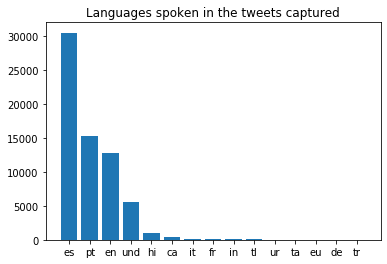

In [4]:
####################################################
# Plot of Languages (autodetected by Twitter)
####################################################
my_tweets.rewind()
langsList = []
for t in my_tweets:
    langsList.append(t['lang'])

D = Counter(langsList)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))
# ----------- Bar Plot ------------------------
plt.bar(range(len(subset)), list(subset.values()), align='center')
plt.xticks(range(len(subset)), subset.keys())
plt.title('Languages spoken in the tweets captured')
plt.show()

In this case, most of the tweets were in spanish which makes sense because most of the hashtags used were in spanish. Also a large amount of them were in portuguese which may relate to the SomosTodosAllan hashtag. Coming in third are tweets in english, and then a large amount have undefined language. 

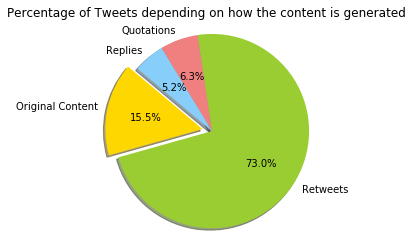

In [5]:
##############################################################
# Plot how many of them are retweets, replies,
# quotations or original tweets
##############################################################
my_tweets.rewind() #Reset cursor
retweets = 0
replies = 0
quotations = 0
originals = 0
for t in my_tweets:
    if t.get('retweeted_status') is not None:
        retweets=retweets+1
    elif t['is_quote_status'] is not False:
        quotations = quotations+1
    elif t.get('in_reply_to_status_id') is not None:
        replies = replies+1
    else:
        originals = originals+1

# ----------- Pie Chart ------------------------
labels = 'Original Content', 'Retweets', 'Quotations', 'Replies'
sizes = [originals, retweets, quotations, replies]
frequencies = [x/numTweets for x in sizes]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Tweets depending on how the content is generated')
plt.show()

As with before, most of the content was generated by retweets. 

We can then check which hashtag was the most popular of the tweets retrieved

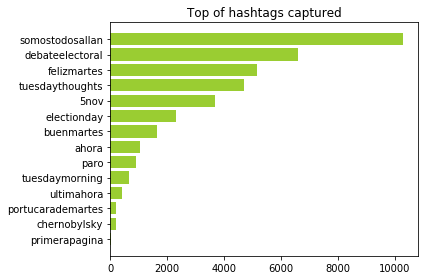

In [6]:
##################################################################
# Plot only filtered hashtags
##################################################################
my_tweets.rewind()
hashList = [] 
words_lower = ['#felizmartes','#paro', '#chernobylsky', '#portucarademartes', '#tuesdaythoughts', '#5nov', '#primerapagina', '#somostodosallan', '#buenmartes', '#ultimahora', '#ahora', '#electionday', '#tuesdaymorning', '#debateelectoral'] 
for t in my_tweets:
    for e in t['entities']['hashtags']:
        if '#' + e['text'].lower() in words_lower or e['text'].lower() in words_lower:
            h = e['text'].lower()
            hashList.append(h)
D = Counter(hashList)
subset = dict(D)
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'yellowgreen')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top of hashtags captured')
plt.tight_layout()
plt.show()

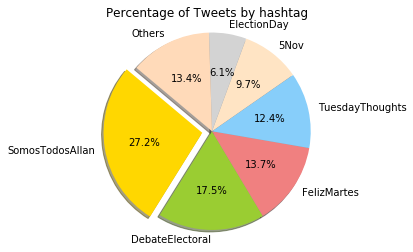

In [7]:
# ----------- Pie Chart ------------------------
others = len(hashList) - subset['somostodosallan'] - subset['debateelectoral'] - subset['felizmartes'] - subset['tuesdaythoughts'] - subset['5nov'] - subset['electionday']
labels = 'SomosTodosAllan', 'DebateElectoral', 'FelizMartes', 'TuesdayThoughts', '5Nov', 'ElectionDay', 'Others'
sizes = [subset['somostodosallan'], subset['debateelectoral'], subset['felizmartes'], subset['tuesdaythoughts'], subset['5nov'], subset['electionday'], others]
frequencies = [x/numTweets for x in sizes]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'bisque', 'lightgrey', 'peachpuff']
explode = (0.1, 0, 0, 0, 0, 0 ,0)  
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Tweets by hashtag')
plt.show()

So the mayority of tweets was with #SomosTodosAllan which represents a 27.2% but now we have a better distribution since the second is #DebateElectoral with 17.5%, and FelizMartes and TuesdayThoughts with 13.7% and 12.4% respectively. 

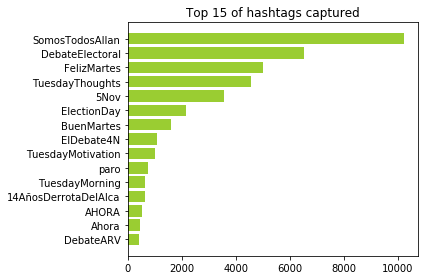

In [8]:
##################################################################
# Plot secondary hashtags
##################################################################
my_tweets.rewind()
hashList = []
for t in my_tweets:
    for e in t['entities']['hashtags']:
        h = e['text']
        hashList.append(h)
D = Counter(hashList)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'yellowgreen')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of hashtags captured')
plt.tight_layout()
plt.show()

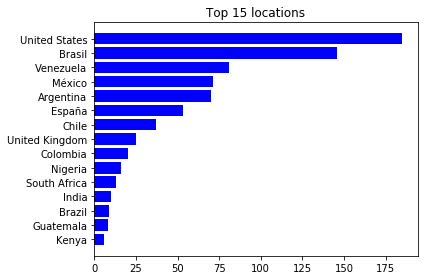

In [9]:
##################################################################
# Plot most common countries
##################################################################
my_tweets.rewind()
geo = []
for t in my_tweets:
    if t['place']: 
        geo.append(t['place']['country'])

D = Counter(geo)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'blue')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 locations')
plt.tight_layout()
plt.show()

The top countries are the US, Brazil and Venezuela. We can look a bit more into this and see which hashtags are popular in each of these top countries 

In [10]:
##################################################################
# Plot countries by hashtags
##################################################################
my_tweets.rewind()
data = []
for t in my_tweets:
    for e in t['entities']['hashtags']:
        if t['place']: 
            d = {'hashtag': e['text'], 'country': t['place']['country']}
            data.append(d)

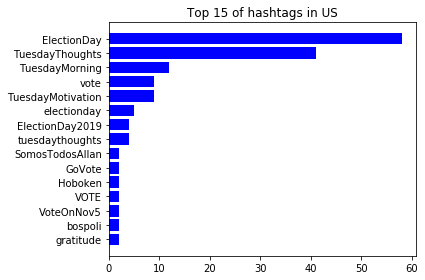

In [11]:
us = []
for d in data:
    if d['country'] == 'United States':
        us.append(d['hashtag'])

D = Counter(us)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'blue')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of hashtags in US')
plt.tight_layout()
plt.show()

In the US, the most popular hashtag, amongst the tweets that have the location, are the ones in english, with the top one being ElectionDay which was a current event that was transcurring that day, also other variations such as vote, electionday, ElectionDay2019, GoVote, VOTE, VoteOnNov5 were amongst the top 15. The other top are mostly based on the day Tuesday, and a few also related to SomosTodosAllan. 

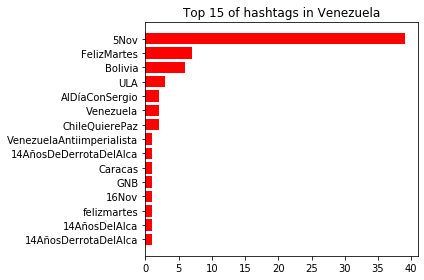

In [12]:
vzla = []
for d in data:
    if d['country'] == 'Venezuela':
        vzla.append(d['hashtag'])

D = Counter(vzla)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'red')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of hashtags in Venezuela')
plt.tight_layout()
plt.show()

In Venezuela, the most used hashtag was 5Nov by vast majority, and the rest have only a few tweets related. 

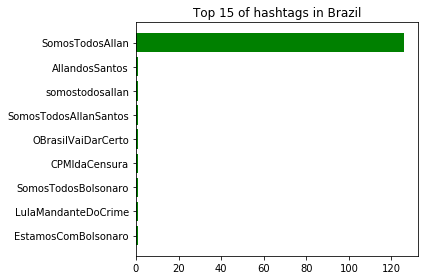

In [13]:
brazil = []
for d in data:
    if d['country'] == 'Brasil':
        brazil.append(d['hashtag'])

D = Counter(brazil)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'green')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of hashtags in Brazil')
plt.tight_layout()
plt.show()

Brazils hashtag was largely dominated by SomosTodosAllan, which makes sense since it was a news that was transcurring in Brazil at the moment. 

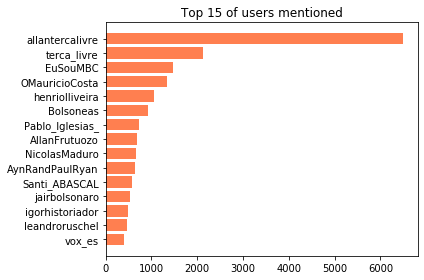

In [14]:
##################################################################
# Plot users mentioned
##################################################################
my_tweets.rewind()
hashList = []
for t in my_tweets:
    for e in t['entities']['user_mentions']:
        h = e['screen_name']
        hashList.append(h)
D = Counter(hashList)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'coral')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of users mentioned')
plt.tight_layout()
plt.show()

Out of the users mentioned, most are also related with the hashtags, for example allantercalivre and terca_livre are related to SomosTodosAllan, since they're the media companies that Allan works in. EuSouMBC is a political party in Brazil, and Bolsoneas, OMauricioCosta, henriolliveira and AllanFrutuozo are the twitter account of users that post comedy or political tweets also related to the EuSouMBC party. The account jairbolsonaro is the twitter account for the Brazilian president Jair Bolsonaro. All of them related to the SomosTodosAllan hashtag so most of the users mentioned, specially those in the top 6 are related to this hashtag. 

Pablo_Iglesias_ and Santi_ABASCAL are both political contenders in the Spanish elections, and part of the debate mentioned in the hashtag DebateElectoral. With vox_es being the political party of Santi_ABASCAL. 

NicolasMaduro is the Venezuelan dictador so is probably related to the tweets that came from Venezuela. 

We can also validate these hipothesis by comparing hashtags with users.

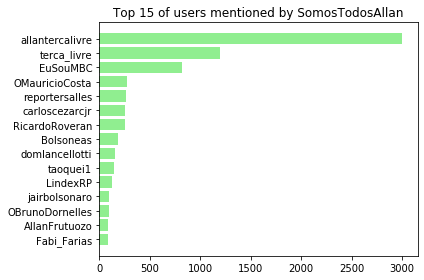

In [15]:
##################################################################
# Plot users mentioned by hashtag: SomosTodosAllan
##################################################################
my_tweets.rewind()
user = []
for t in my_tweets:
    for e in t['entities']['user_mentions']:
        if 'SomosTodosAllan' in [e['text'] for e in t['entities']['hashtags']]:
            u = e['screen_name']
            user.append(u)
D = Counter(user)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'lightgreen')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of users mentioned by SomosTodosAllan')
plt.tight_layout()
plt.show()

So as mentioned, most of the users mentioned with the hashtag SomosTodosAllan are those related to the brazilian accounts and politics. 

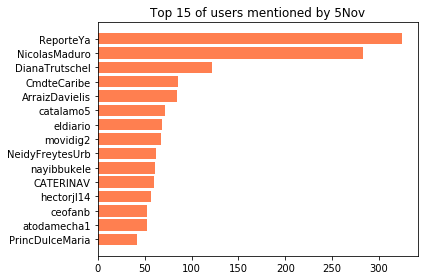

In [16]:
##################################################################
# Plot users mentioned by hashtag: 5Nov
##################################################################
my_tweets.rewind()
user = []
for t in my_tweets:
    for e in t['entities']['user_mentions']:
        if '5Nov' in [e['text'] for e in t['entities']['hashtags']]:
            u = e['screen_name']
            user.append(u)
D = Counter(user)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'coral')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of users mentioned by 5Nov')
plt.tight_layout()
plt.show()

Of the top users mentioned in 5Nov was NicolasMaduro, considering that the 5Nov was the most popular hashtag captured for tweets that had location and were in Venezuela. The user is probably mentioned in other hashtags as well, since ReporteYa (a Venezuelan news site) has more mentions in the 5Nov hashtag. 

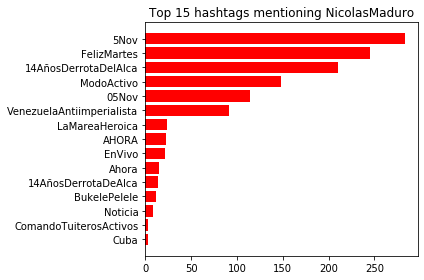

In [17]:
##################################################################
# Plot hashtags for user NicolasMaduro
##################################################################
my_tweets.rewind()
hashList = []
for t in my_tweets:
    for e in t['entities']['user_mentions']:
        if e['screen_name'] == 'NicolasMaduro':
            for h in t['entities']['hashtags']:
                hashList.append(h['text'])

D = Counter(hashList)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'red')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 hashtags mentioning NicolasMaduro')
plt.tight_layout()
plt.show()

As mentioned before, NicolasMaduro is also popular in other hashtags captured like "FelizMartes"

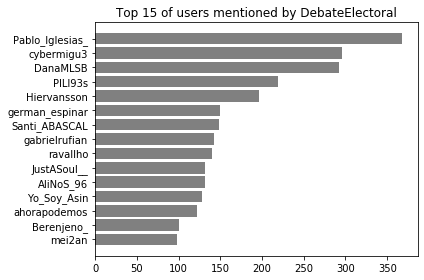

In [18]:
##################################################################
# Plot users mentioned by hashtag: DebateElectoral
##################################################################
my_tweets.rewind()
user = []
for t in my_tweets:
    for e in t['entities']['user_mentions']:
        if 'DebateElectoral' in [e['text'] for e in t['entities']['hashtags']]:
            u = e['screen_name']
            user.append(u)
D = Counter(user)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

# ----------- Horizontal Bar Plot ------------------------
pos = range(len(sorted_subset))
plt.barh(pos, [val[1] for val in sorted_subset], align = 'center', color = 'grey')
plt.yticks(pos, [val[0] for val in sorted_subset])
plt.title('Top 15 of users mentioned by DebateElectoral')
plt.tight_layout()
plt.show()

The DebateElectoral hashtag also has alot of users related to politics like gabrielrufian and ahorapodemos.

## Using models

### Sentiment Analysis

Sentiment analysis allows us to determine the type of interactions the tweets have with the different entities, and gives insights on how topics are being perceived. Sentiments can be positive, negative or neutral (informative) and it reflects the opinions people are expressing towards the entity.

Using the data obtained before, we can review the sentiment users are expressing towards the different entities mentioned in the tweets. For this, we use two pre-trained sentiment analyzer, one for tweets in english (SentimentIntensityAnalyzer), and another for tweets in spanish (SentimentClassifier from https://github.com/aylliote/senti-py). 

In [156]:
import pandas as pd
from langdetect import detect
from classifier import SentimentClassifier
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
clf = SentimentClassifier()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/santiago/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We move the data from the cursor to a dataframe, which will make it easier to use with the sentiment analysis and other models. We only retrieve the fields of the data that we want and additionally add a new language detector to compare with twitters automatic language detection. 

In the dataframe, on tweet is stored per row, but, if the tweet has any user mentions, we copy the contents of the tweet to a new row adding the entity, doing this for all the entities, adding a new row for each one. So if the tweet mentions 3 users, then 4 rows are going to be inserted, one without any entity and then one for each user. 

In [169]:

# Move data to a DataFrame
my_tweets.rewind()
#d = list(my_tweets)
tweets = []
for t in my_tweets:
    tweet = {}
    tweet['id'] = str(t['_id'])
    tweet['username'] = t['user']['screen_name']
    
    if t.get('retweeted_status') is not None:
        tweet['type'] = 'retweet'
    elif t['is_quote_status'] is not False:
        tweet['type'] = 'quote_status'
    elif t.get('in_reply_to_status_id') is not None:
        tweet['type'] = 'reply'
    else:
        tweet['type'] = 'original'
        
    if 'extended_tweet' in t:    
        tweet['text'] = t['extended_tweet']['full_text']
    elif 'retweeted_status' in t and 'extended_tweet' in t['retweeted_status']:
        tweet['text'] = t['retweeted_status']['extended_tweet']['full_text']
    else:
        tweet['text'] = t['text']
    
    try:
        tweet['lang'] = detect(tweet['text'])
    except:
        tweet['lang'] = 'und'
        
    tweet['tw_lang'] = t['lang']
    # record with no entity
    tweet['entity'] = ''
    tweets.append(tweet)
    for e in t['entities']['user_mentions']:
        te = tweet.copy()
        te['entity'] = e['screen_name']
        #new record for every entity
        tweets.append(te)
        

Comparing both implementations of language detection, the twitter auto detected have a higher number of undefined, and doesnt detect as many tweets that are in Spanish, so we will use our own implementation for the sentiment analysis.

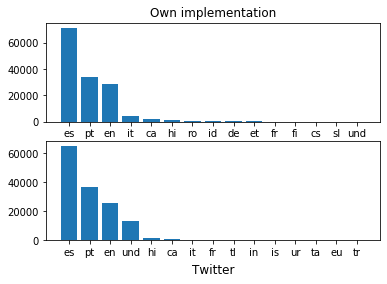

In [170]:
####################################################
# Plot of Languages (autodetected by Twitter)
####################################################
langsList = [t['lang'] for t in tweets]
twlangsList = [t['tw_lang'] for t in tweets]

D = Counter(langsList)
subset = dict(D.most_common(15))
sorted_subset = sorted(subset.items(), key=operator.itemgetter(1))

D = Counter(twlangsList)
subset2 = dict(D.most_common(15))
sorted_subset2 = sorted(subset.items(), key=operator.itemgetter(1))
# ----------- Bar Plot ------------------------
plt.subplot(2,1,1)
plt.bar(range(len(subset)), list(subset.values()), align='center')
plt.xticks(range(len(subset)), subset.keys())
plt.title('Own implementation')
plt.subplot(2,1,2)
plt.bar(range(len(subset2)), list(subset2.values()), align='center')
plt.xticks(range(len(subset2)), subset2.keys())
plt.title('Twitter', y=-0.4)
plt.show()

Some examples like the following are detected differently in each case, these are hard to determine since they mostly contain user mentions and some words in spanish and others in english. For example, it says 'Hello' but also includes spanish hastags like 'BuenMartes'

In [171]:
tweets[6]

{'id': '5dc15f02724b90a85421a52d',
 'username': 'TerapeutaTRE',
 'type': 'reply',
 'text': '@Yesy09752495 @halconavicencio @LuzAngelica_22 @yelarvel @ciprianobracca @luzma04042407 @MagDivina @alejandrator2 ┏━━°❀•°🎀:°•❀°━━┓\n┗━━❀•°:🎀:°• ❀°━━┛\n♡Hello♥\n  🥀🦋🦋#TerapeutaTRE\n💐｡🦋\n🦋@TerapeutaTRE\n💐@halconavicencio\n🦋@LuzAngelica_22\n💐@yelarvel\n🦋@Yesy09752495\n💐@ciprianobracca\n🦋@luzma04042407\n💐@MagDivina\n🦋@alejandrator2\n▶#AngelicsTips\n▶#BuenMartes😊\n🦋💐🦋 https://t.co/Tifb0InQdN',
 'lang': 'es',
 'tw_lang': 'en',
 'entity': 'LuzAngelica_22'}

In [172]:
sentiments = []
for t in tweets:
    if t['lang'] == 'es' :
        t['sentiment'] = clf.predict(t['text'])
        sentiments.append(t)
    elif t['lang'] == 'en': 
        t['sentiment'] = sid.polarity_scores(t['text'])['compound']
        sentiments.append(t)

In [50]:
sentiments[0]

{'id': ObjectId('5dc15f02724b90a85421a52d'),
 'username': 'TerapeutaTRE',
 'type': 'reply',
 'text': '@Yesy09752495 @halconavicencio @LuzAngelica_22 @yelarvel @ciprianobracca @luzma04042407 @MagDivina @alejandrator2 ┏… https://t.co/8QXnaDUBWf',
 'lang': 'es',
 'tw_lang': 'en',
 'entity': '',
 'sentiment': 0.3573939275066913}

In [173]:
df = pd.DataFrame(sentiments)
df.describe()

,sentiment
count,100429.000000
mean,0.229090
std,0.318252
min,-0.972300
25%,0.016795
50%,0.123154
75%,0.446308
max,0.996963


In [174]:
# top mentions 
df['entity'].value_counts().nlargest(10)

                   47124
Pablo_Iglesias_      719
allantercalivre      695
AynRandPaulRyan      631
NicolasMaduro        603
Santi_ABASCAL        574
vox_es               393
realDonaldTrump      340
ReporteYa            325
Maria_Marione        311
Name: entity, dtype: int64

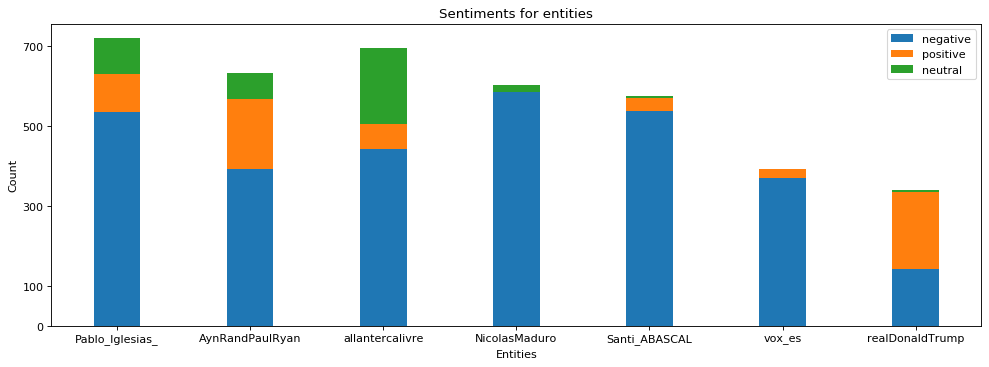

In [175]:
header = ['negative','positive', 'neutral']
positives = (df[(df['entity']=='Pablo_Iglesias_') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='AynRandPaulRyan') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='allantercalivre') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='NicolasMaduro') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='Santi_ABASCAL') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='vox_es') & (df['sentiment'] > 0.65)].count()[0],
             df[(df['entity']=='realDonaldTrump') & (df['sentiment'] > 0.65)].count()[0])

negatives = (df[(df['entity']=='Pablo_Iglesias_') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='AynRandPaulRyan') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='allantercalivre') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='NicolasMaduro') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='Santi_ABASCAL') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='vox_es') & (df['sentiment'] < 0.45)].count()[0],
             df[(df['entity']=='realDonaldTrump') & (df['sentiment'] < 0.45)].count()[0])

neutral = (df[(df['entity']=='Pablo_Iglesias_') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='AynRandPaulRyan') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='allantercalivre') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='NicolasMaduro') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='Santi_ABASCAL') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='vox_es') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0],
           df[(df['entity']=='realDonaldTrump') & (df['sentiment'] <= 0.65) & (df['sentiment'] >= 0.45)].count()[0])


N = 7
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
p1 = plt.bar(ind, negatives, width)
p2 = plt.bar(ind, positives, width,
             bottom=negatives)
p3 = plt.bar(ind, neutral, width,
             bottom=np.array(positives)+np.array(negatives))

plt.ylabel('Count')
plt.xlabel('Entities')
plt.title('Sentiments for entities')
plt.xticks(ind, ('Pablo_Iglesias_','AynRandPaulRyan', 'allantercalivre', 'NicolasMaduro',
                'Santi_ABASCAL','vox_es','realDonaldTrump'))
plt.yticks([0, 100, 300, 500, 700])
plt.legend((p1[0], p2[0], p3[0]), ('negative', 'positive', 'neutral'))

plt.show()

In [126]:
ind[0]

0

## Conclusion

Capturing data from twitter via the API can be helpful to analyse trending topics and the users related which can be used to study publicity campaings or political issues. In these experiments we were able to detect current events in K-pop culture and the reach that these events had, and also track down political events in Brazil, Spain, US and Venezuela. Unfortunately, most tweets don't have location activated, with only a few hundred of them being captured out of the more than 200k tweets found.

Storing data in MongoDB is very simple, as we don't have to worry about formatting the data when we gather it, rather, just by turning it into json we can insert it directly into the database. This allows us to store large volumes of data as fast as possible and then focus on formatting when we are going to analyse it. Also, it was possible to store more than 200k tweets and the retrieval was still very fast and efficient, but for larger amount of records, MongoDB provides ways to query the data so that we get only the data we are interested in. 